# Intro

The dataset we chose is from National Institute of Diabetes and Digestive and Kidney Diseases. The dataset contains multiple medical indicators as well as one target value, Outcome. Outcome is represetned as either a 0 or a 1, where a 0 represents the patient does not have diabetes and a 1 indicates the patient does have diabetes. 

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [119]:
db = pd.read_csv('diabetes.csv')

In [120]:
db.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [121]:
db.shape


(768, 9)

In [122]:
db.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [123]:
db.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [124]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [125]:
db.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


This gives us important information about the data.
We can see that the min values for all of the compenets is zero, which in this data set is not physically possible for some of the indicators. 
BMI, Glucose,, SkinThickness, Insulin, and BloodPressure cannot have a physical value of zero. 
These values will have to be replaces with either the mean of the dataset or something else. Also, we should be on the lookout for outliers. Insulin has a mean of 79 with a max of 846, this could impact the data.

In [126]:
'''We have no missing entires'''
db.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [127]:
db.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

##  Zero Values

In [129]:
'''This tells us how many zero values there are in the dataset for the attributes that cannot have zero as a legitimate
value'''

gluZero = (db['Glucose'] == 0).sum()
bpZero = (db['BloodPressure'] == 0).sum()
sktZero = (db['SkinThickness'] == 0).sum()
bmiZero = (db['BMI'] == 0).sum()
inZero = (db['Insulin'] == 0).sum()

print(f'Glucose has {gluZero} zero values')
print(f'Blood pressure has {bpZero} zero values')
print(f'Skin Thickness has {sktZero} zero values')
print(f'Insulin has {inZero} zero values')
print(f'BMI has {bmiZero} zero values')

Glucose has 5 zero values
Blood pressure has 35 zero values
Skin Thickness has 227 zero values
Insulin has 374 zero values
BMI has 11 zero values


As there are a lot of values for Skin Thickness and Insulin that are zero, we are going to replace those values with 
the median of the dataset. For the others, we will replace the values with the median of the data. We should replace the 
missing values with nan then show the distibution of the remaining values. Then make the decision to fill the 0 values
with the mean or median of the remaining values.

In [304]:
newdf = db.copy(deep = True)

In [305]:
''' Replace the zero value with NaN, so when we graph the data we can see what actual values we are working with. 
'''

newdf[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = newdf[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

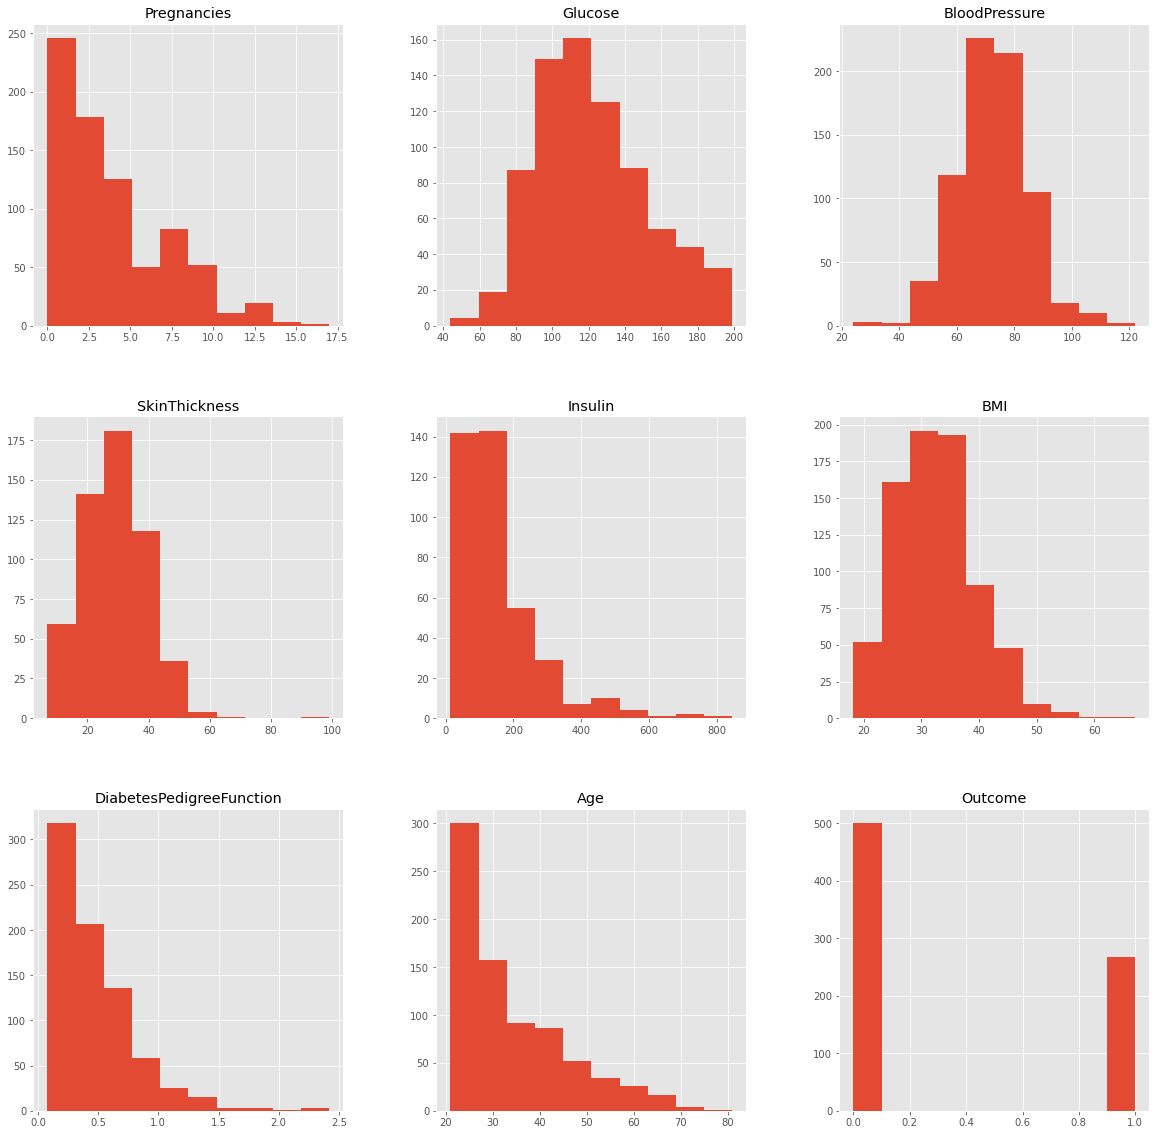

In [306]:
'''Create a histogram to look for skew, if our data is skewed then we will have outliers and we will need to manage them'''
newdf.hist(figsize = (20,20))

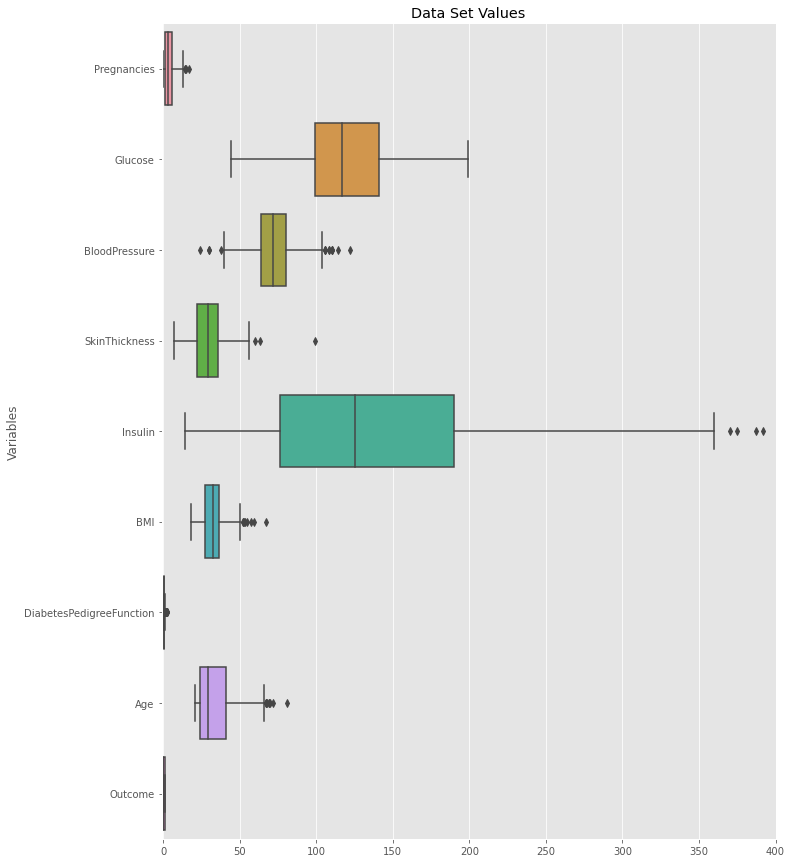

In [308]:
''' Now we do a box and whisker plot, to visualize our outliers. This will help us decide if we are going to replace the 
0 values with the mean or median of the actual values that we are keeping. 
'''
#plt.style.use('ggplot') # Using ggplot2 style visuals 

f, ax = plt.subplots(figsize=(11, 15))
ax.set(xlim=(-1, 400))
plt.ylabel('Variables')
plt.title("Data Set Values")
ax = sns.boxplot(data = newdf, orient = 'h')

In [135]:
newdf.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

## Fill NaN values

We replace the NaN values in Glucose and Blood Pressure with their respective mean, and Insulin, BMI, and Skin Thickness were replaced with the median of each. 

In [309]:
'''We replace the NaN values with either the mean or median of the rest of column entries. If their are a lot of impactful
outliers we replace the NaN values with the median, otherwise we use the mean. '''
newdf['Glucose']=newdf['Glucose'].fillna(newdf['Glucose'].mean())
newdf['BloodPressure'] = newdf['BloodPressure'].fillna(newdf['BloodPressure'].mean())
newdf['Insulin'] = newdf['Insulin'].fillna(newdf['Insulin'].median())
newdf['BMI'].fillna(newdf['BMI'].median(), inplace = True)
newdf['SkinThickness'] = newdf['SkinThickness'].fillna(newdf['SkinThickness'].median())

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

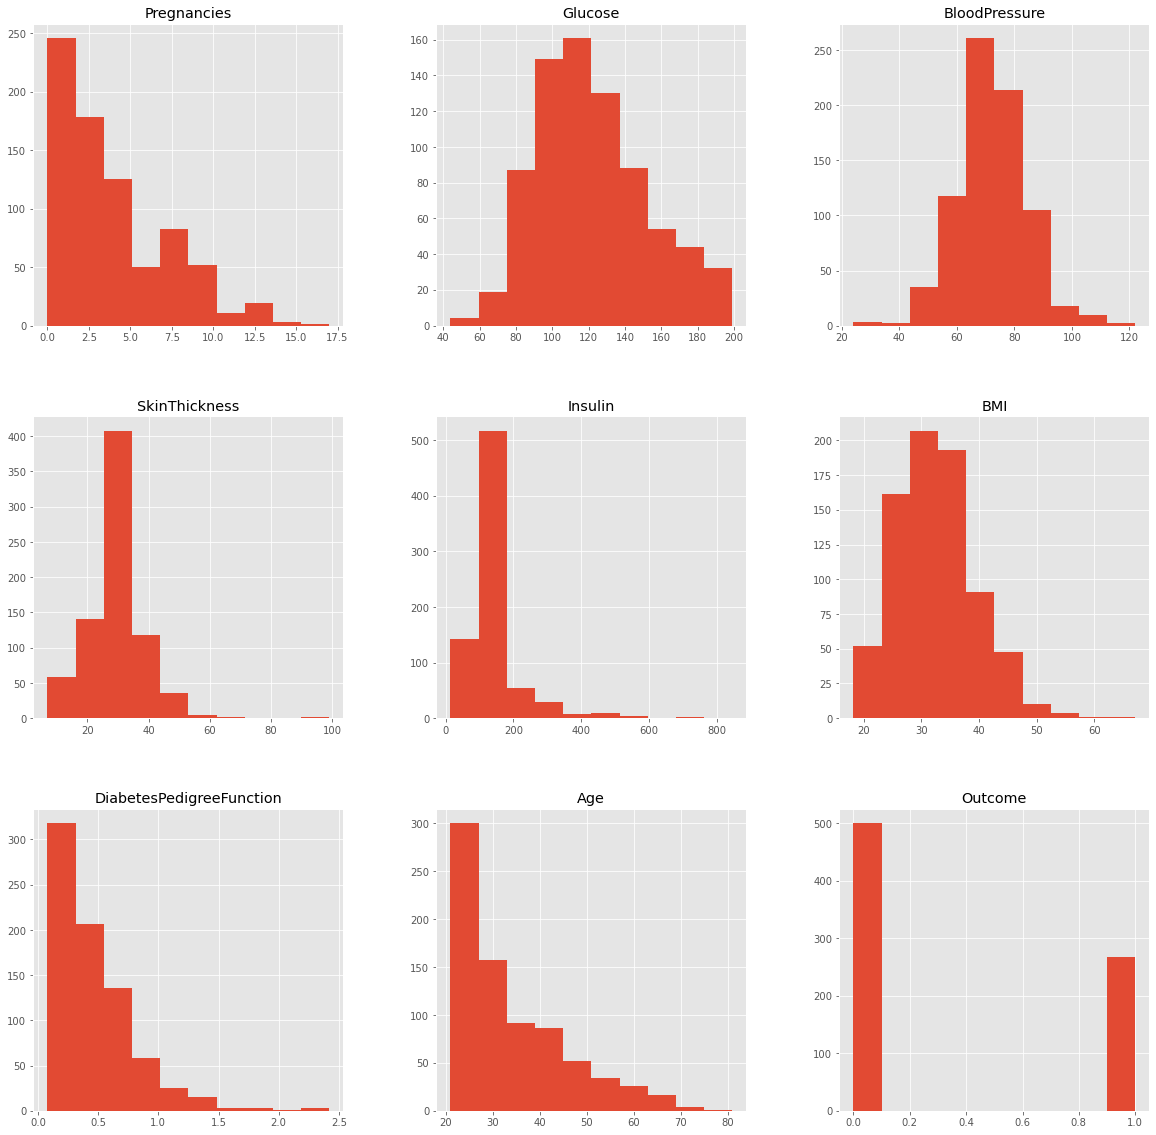

In [310]:
newdf.hist(figsize = (20,20))

<AxesSubplot:>

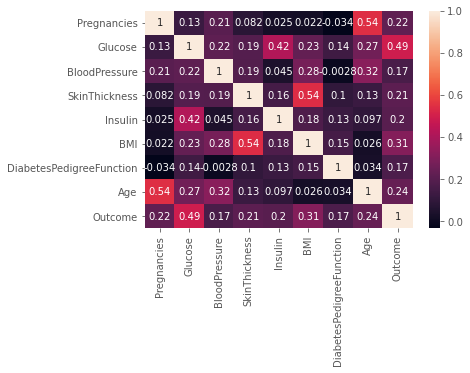

In [292]:
'''use a heatmap to visualize the connection between two varibales. The values range from -1 to 1 where 1 means the variables
100% positivly correlated, so when one varibale goes up the other does up the exaact same amount. When two variables have a 
value of -1, they are oppositly correlated. So when one variable goes up the other goes down by the exact amount. When the
relationship between two variables is zero, there is no correlation. '''

corrmat=newdf.corr()
sns.heatmap(corrmat, annot=True)

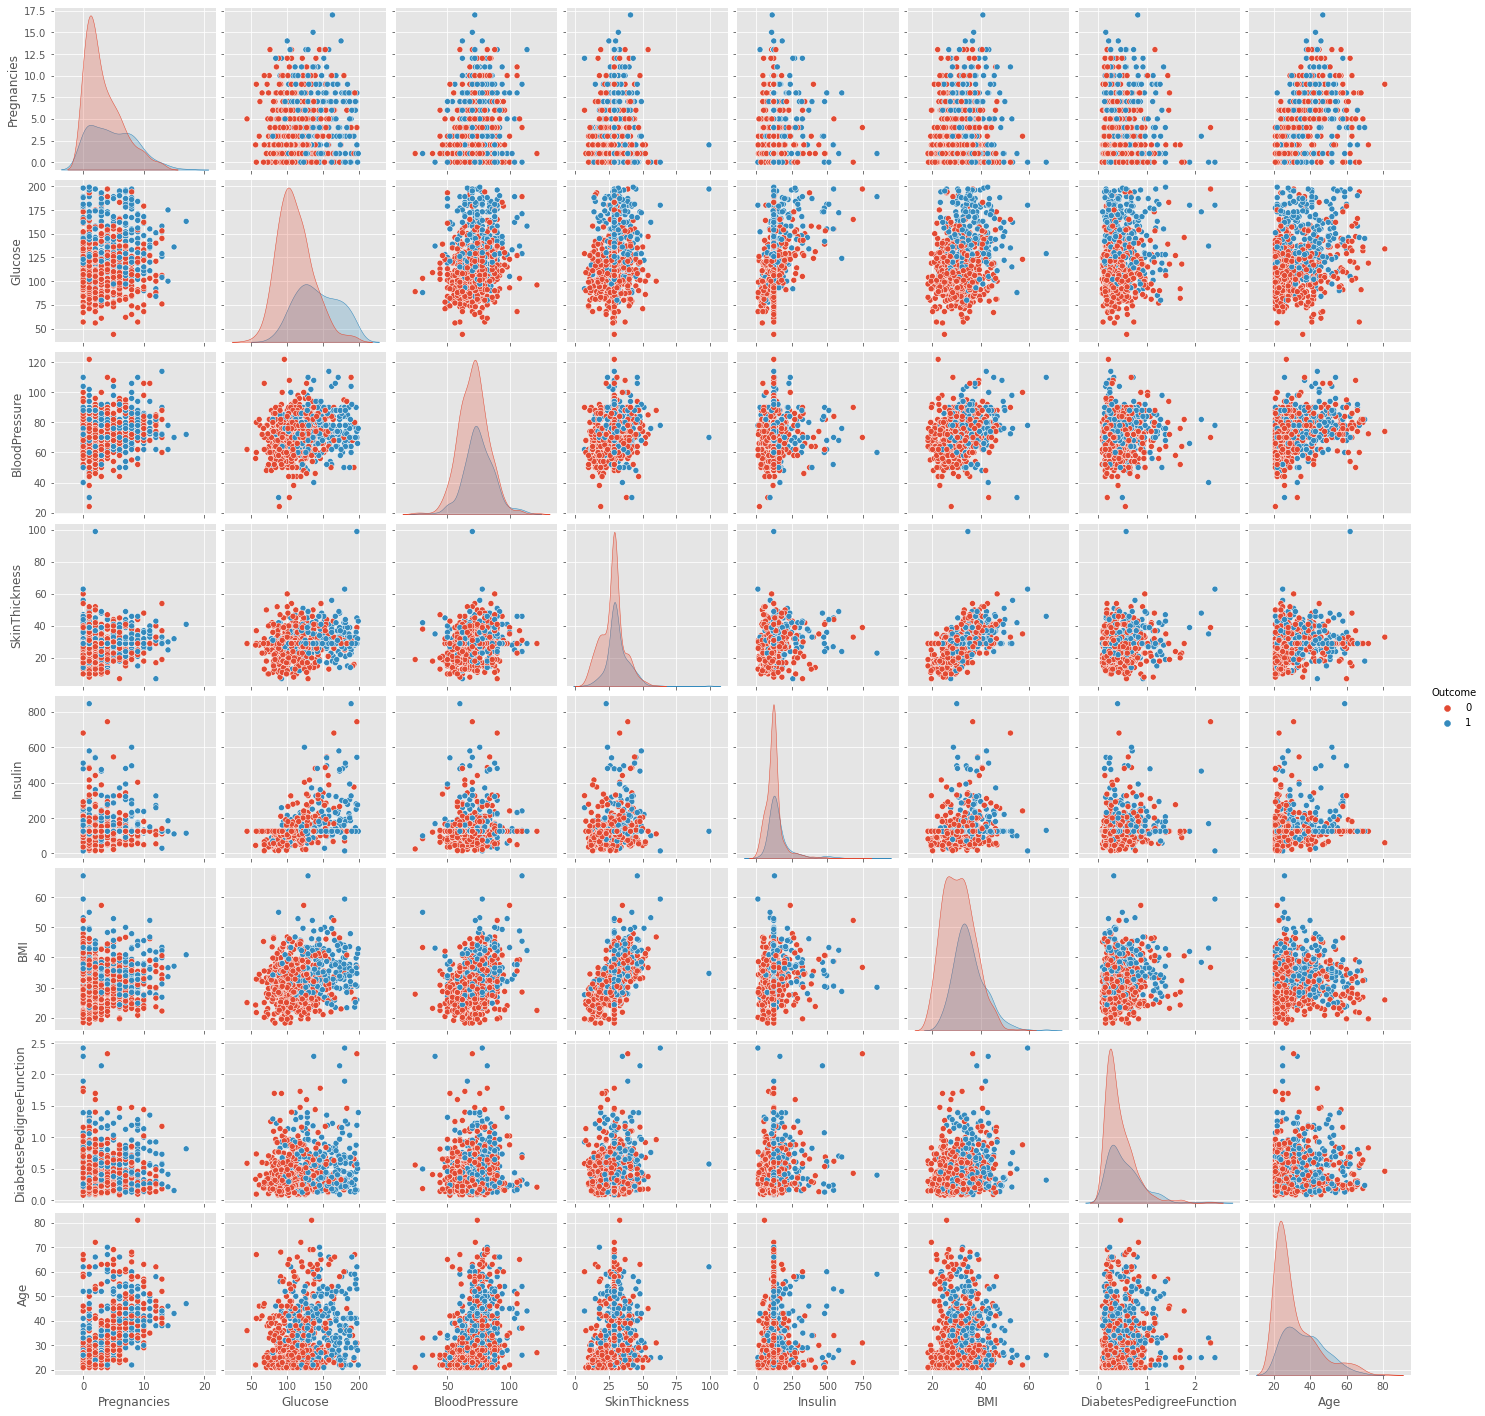

In [209]:
'''Looking at the pairplot the data isnt really linear so we could try and use a clustering algorithm. We will use KNN 
when we create our model'''
sns.pairplot(newdf, hue = 'Outcome')
# this is a pairplot showing a scatterplot of all possible combinations of the variables in the dataframe.
# The red dots are where Outcome has a value of 0, so which would indicate no instance of diabetes
# The blue dots are where Outcome has a value of 1, which indicates there is an instacne of diabetes



## Standardize Data

In [139]:
#scale the data
from sklearn.preprocessing import StandardScaler
std_scl = StandardScaler()
'''here we use fit_transform, the fit part is simply the scaling, so it scales the data by subtracting the mean from each point
and dividing by the standard deviation. the transfrorm part sets the new dataframe scl_df to the dataframe we have been
using newdf but without the outcome as a column, because we do not need to fit or standardize the outcome column.'''
X=  pd.DataFrame(std_scl.fit_transform(newdf.drop(["Outcome"],axis = 1),),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])


In [140]:
'''we separate the outcome from the standardized dataframe we just created'''
y = newdf.Outcome

## Train Test Split

In [253]:
'''now its time to create our test and train datasets'''
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .33, random_state = 42)


## Model Creation

In [317]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
# this is a dictionary of all the values we want to test
param_grid = {'n_neighbors':np.arange(1,15)}
knn_gscv = GridSearchCV(knn, param_grid, cv=5)
#cv of 5 means it cross validates 5 times


In [318]:
knn_gscv.fit(X_train, y_train)
knn_gscv.best_params_

{'n_neighbors': 8}

In [319]:
knn_gscv.best_score_

0.7801637159718255

In [320]:
knn.fit(X_train,y_train)
knn.score(X_test,y_test)
# knn.score will return the mean accuracy of the test data

0.7165354330708661

In [321]:
# use a confusion matrix to show our results
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
confusion_matrix(y_test,y_pred)

array([[132,  36],
       [ 36,  50]], dtype=int64)

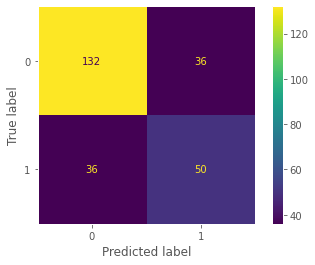

In [322]:
# show the metrics, a more visual understanding of our confusion martix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn, X_test, y_test)
plt.grid(False)
plt.show()

In [323]:
'''This is the same as the KNeighborsClassifier .score function'''
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7165354330708661